# Registro de datos

1. **"age"**: Edad (Numerica)
2. **"job"**: Trabajo (categorica: "admin","unknown","unemployed","management","housemaid","entrepreneur","student","blu-collar","self-employed","retired","technician","services")
3. **"marital"**: estado civil (categórica : "married","divorced","single")
4. **"education"**: nivel educativo (categórica : "unknown","secondary","primary","tertiary")
5. **"default"**: si dejó de pagar sus obligaciones (categórica: "yes","no")
6. **"balance"**: saldo promedio anual en euros (numérica)
7. **"housing"**: ¿Tiene o no credito hipotecario? (categórica: "yes","no")
8. **"loan"**: ¿Tiene o no credito de consumo? (categórica: "yes","no")
9. **"contact"**: Medio por el cual fue contactado (categórica: "unknown","telephone","cellular")
10. **"day"**: último día del mes en el que fue contactada (numérica)
11. **"month"**: último mes en el que fue contactada (categórica: "jan","feb","mar",...,"nov","dec")
12. **"duration"**: duracion en seg. del ultimo contacto (numérica)
13. **"camping"**: número total de veces que fue contactada durante la campaña (numérica)
14. **"pdays"**: Número de dían transcurridos despue de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente).
15. **"previous"**: número de veces que ha sido contactada antes de esta campaña (numérica)
16. **"poutcome"**: Resultado de la campaña de marketing anterior(categórica: "unknown","other","failure","success")
17. **"y"**:: categoría ¿El cliente se suscribió a un deposito a término? (categórica: "yes","no")

# Limpieza de datos

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes

1. Datos faltantes en algunas celdas.
2. Columnas irrelevantes (que no responden al problema que queramos resolver).
3. Registros (filas) repetidos.
4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos.
5. Errores tipográficos en el caso de las variables categóricas.

- Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis de datos. 
- Hay que tener en cuenta que muchas veces en la digitación de los datos ocurren falta ortograficas, digitación erroneao de un numero, marcar mal una opción, entre otros. Estos valores fuera de sí deben ser revisados y limpiados.
- En algunos casos se pueden usar modelos de Machine Learning.
- Dependiendo de la cantidad de registros con datos faltantes podemos optar por la opción de eliminarlos de nuestro dataset

# Columnas Irrelevantes

Una columna irrelevantes puede ser:
- Una columna que no contiene información relevante para el problemas que queramos resolver. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente(deporte favorito, hobbies, comida favorita,etc.)
- Una columna categorica pero con un solo nivel. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- Una columna numérica pero con un sólo valor. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- Columnas con información redundante. Por ejemplo si además de las columnas "month" y "day" tuviesemos la columna "month-day", resultado de combinar estas dos celdas.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas o nivel, o columnas numéricas con un solo valor.

In [28]:
#Importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#Importación de datset
data = pd.read_csv("dataset_banco.csv")

#Visualización Column and rows
print(data.shape)

#Visualización 5 primeros registros
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [30]:
#Obtener información sobre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [31]:
 #Eliminar registros con datos faltantes
#.dropna remueve filas con valores NULL
data.dropna(inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [ ]:
#Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} subniveles')

In [ ]:
#Mostrara todos los datos con valores numéricos
data.describe()

In [16]:
#Filas repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas:{data.shape}')
data.drop_duplicates(inplace= True)
print(f'Tamaño del set despues de eliminar las filas repetidas:{data.shape}')

Tamaño del set antes de eliminar las filas repetidas:(45207, 17)
Tamaño del set despues de eliminar las filas repetidas:(45203, 17)


# Outliers en las variables numericas

No siempre se deben eliminar los Outliers porque dependiendo de la variable numérica analizada estos pueden contener información importante

creemos graficas tipo "boxplot" de las columnas numéricas

**Observaciones**:
- "Age": Hay sujetos con edades mucho mayor a los 100 años.
- "duration": Hay valores negativos.
- "previous": Hay un valor extremadamente alto (cercano a 300).

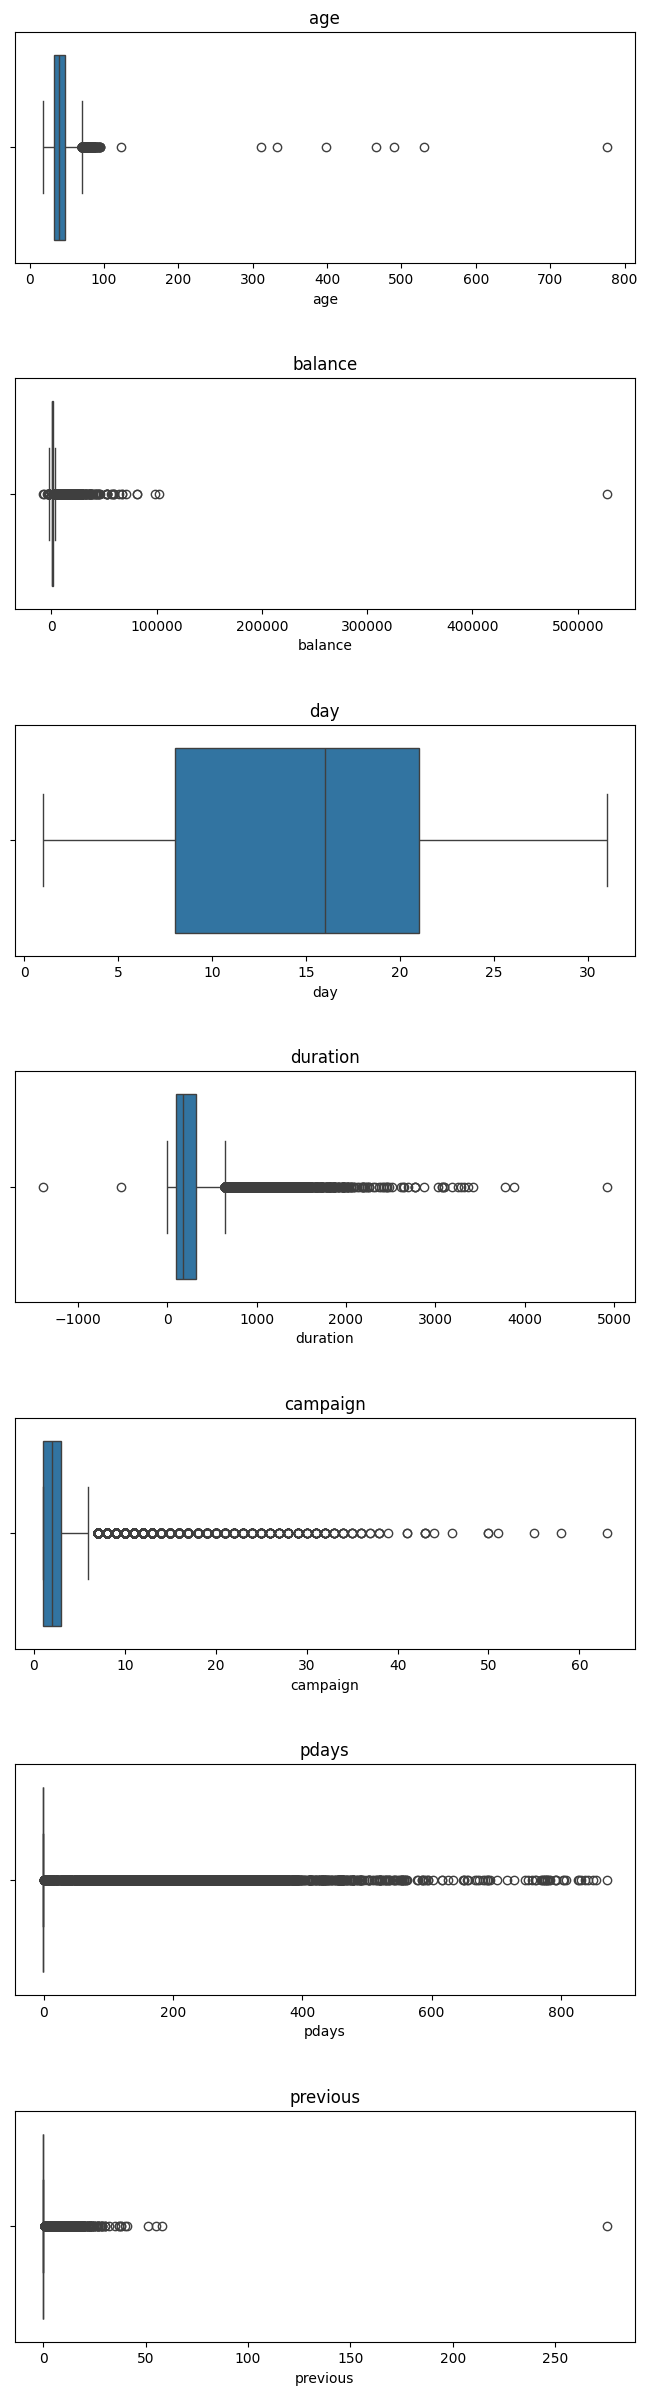

In [21]:
#Generar gráficas individuales pues las variables numéricas estan en rangos diferentes
cols_num = ['age','balance','day','duration','campaign','pdays','previous']

fig, ax= plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x= col, data = data, ax = ax[i])
    ax[i].set_title(col)

In [32]:
#Eliminar filas con "age" > 100
print(f'Tamaño del set antes de eliminar registros de edad:{data.shape}')
data = data[data['age'] <= 100]
print(f'Tamaño del set despues de elimninar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad:(45207, 17)
Tamaño del set despues de elimninar registros de edad: (45199, 17)


In [33]:
#Eliminar filas con "duration" > 0
print(f'Tamaño del set antes de eliminar registros de edad:{data.shape}')
data = data[data['duration'] > 0]
print(f'Tamaño del set despues de elimninar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad:(45199, 17)
Tamaño del set despues de elimninar registros de edad: (45194, 17)


In [24]:
#Eliminar filas con "previous" > 100
print(f'Tamaño del set antes de eliminar registros de edad:{data.shape}')
data = data[data['previous'] <= 100]
print(f'Tamaño del set despues de elimninar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad:(10882, 17)
Tamaño del set despues de elimninar registros de edad: (10882, 17)


C:\Users\yerko\AppData\Local\Temp\ipykernel_2948\181586655.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 90)
C:\Users\yerko\AppData\Local\Temp\ipykernel_2948\181586655.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 90)
C:\Users\yerko\AppData\Local\Temp\ipykernel_2948\181586655.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 90)
C:\Users\yerko\AppData\Local\Temp\ipykernel_2948\181586655.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_x

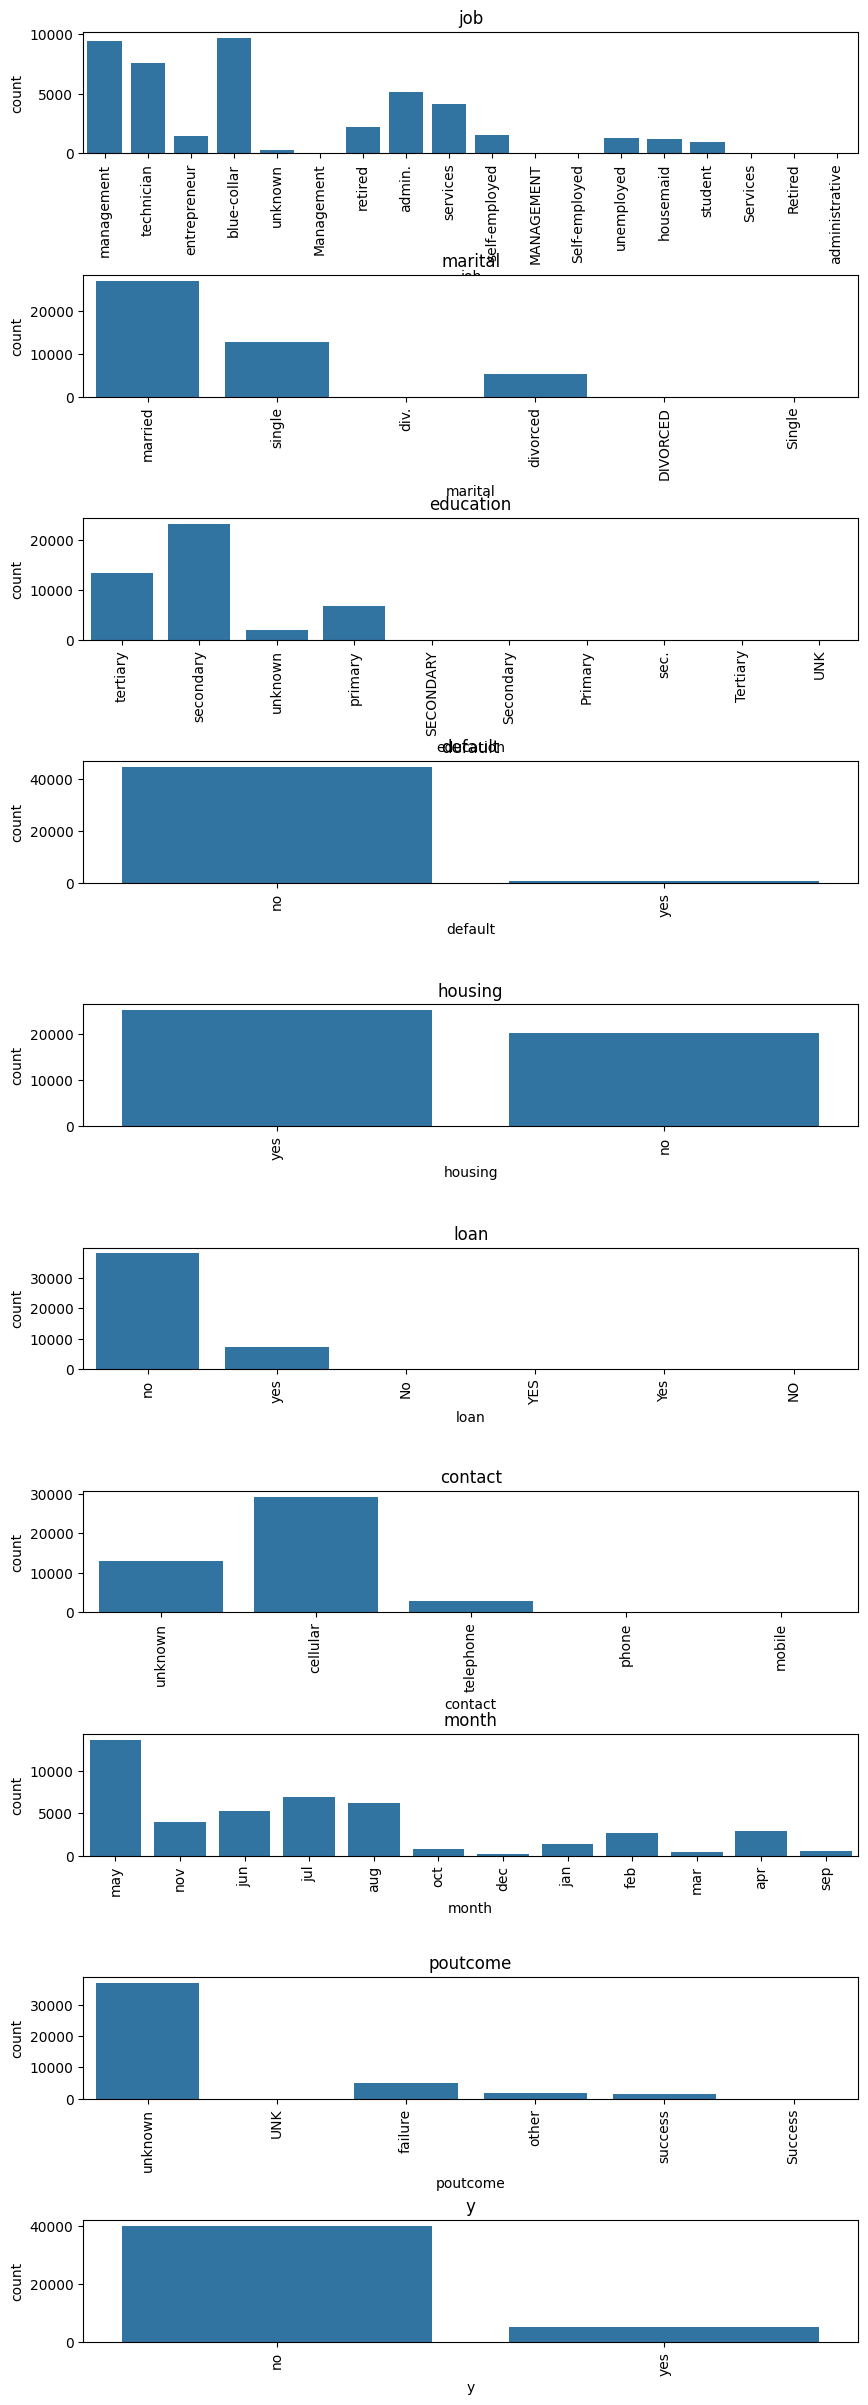

In [38]:
#Generar gráficas individuales pues las variables numéricas estan en rangos diferentes
cols_num = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

fig, ax= plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sns.countplot(x= col, data = data, ax = ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 90)

C:\Users\yerko\AppData\Local\Temp\ipykernel_2948\3269222435.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 30)
C:\Users\yerko\AppData\Local\Temp\ipykernel_2948\3269222435.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 30)
C:\Users\yerko\AppData\Local\Temp\ipykernel_2948\3269222435.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 30)
C:\Users\yerko\AppData\Local\Temp\ipykernel_2948\3269222435.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].g

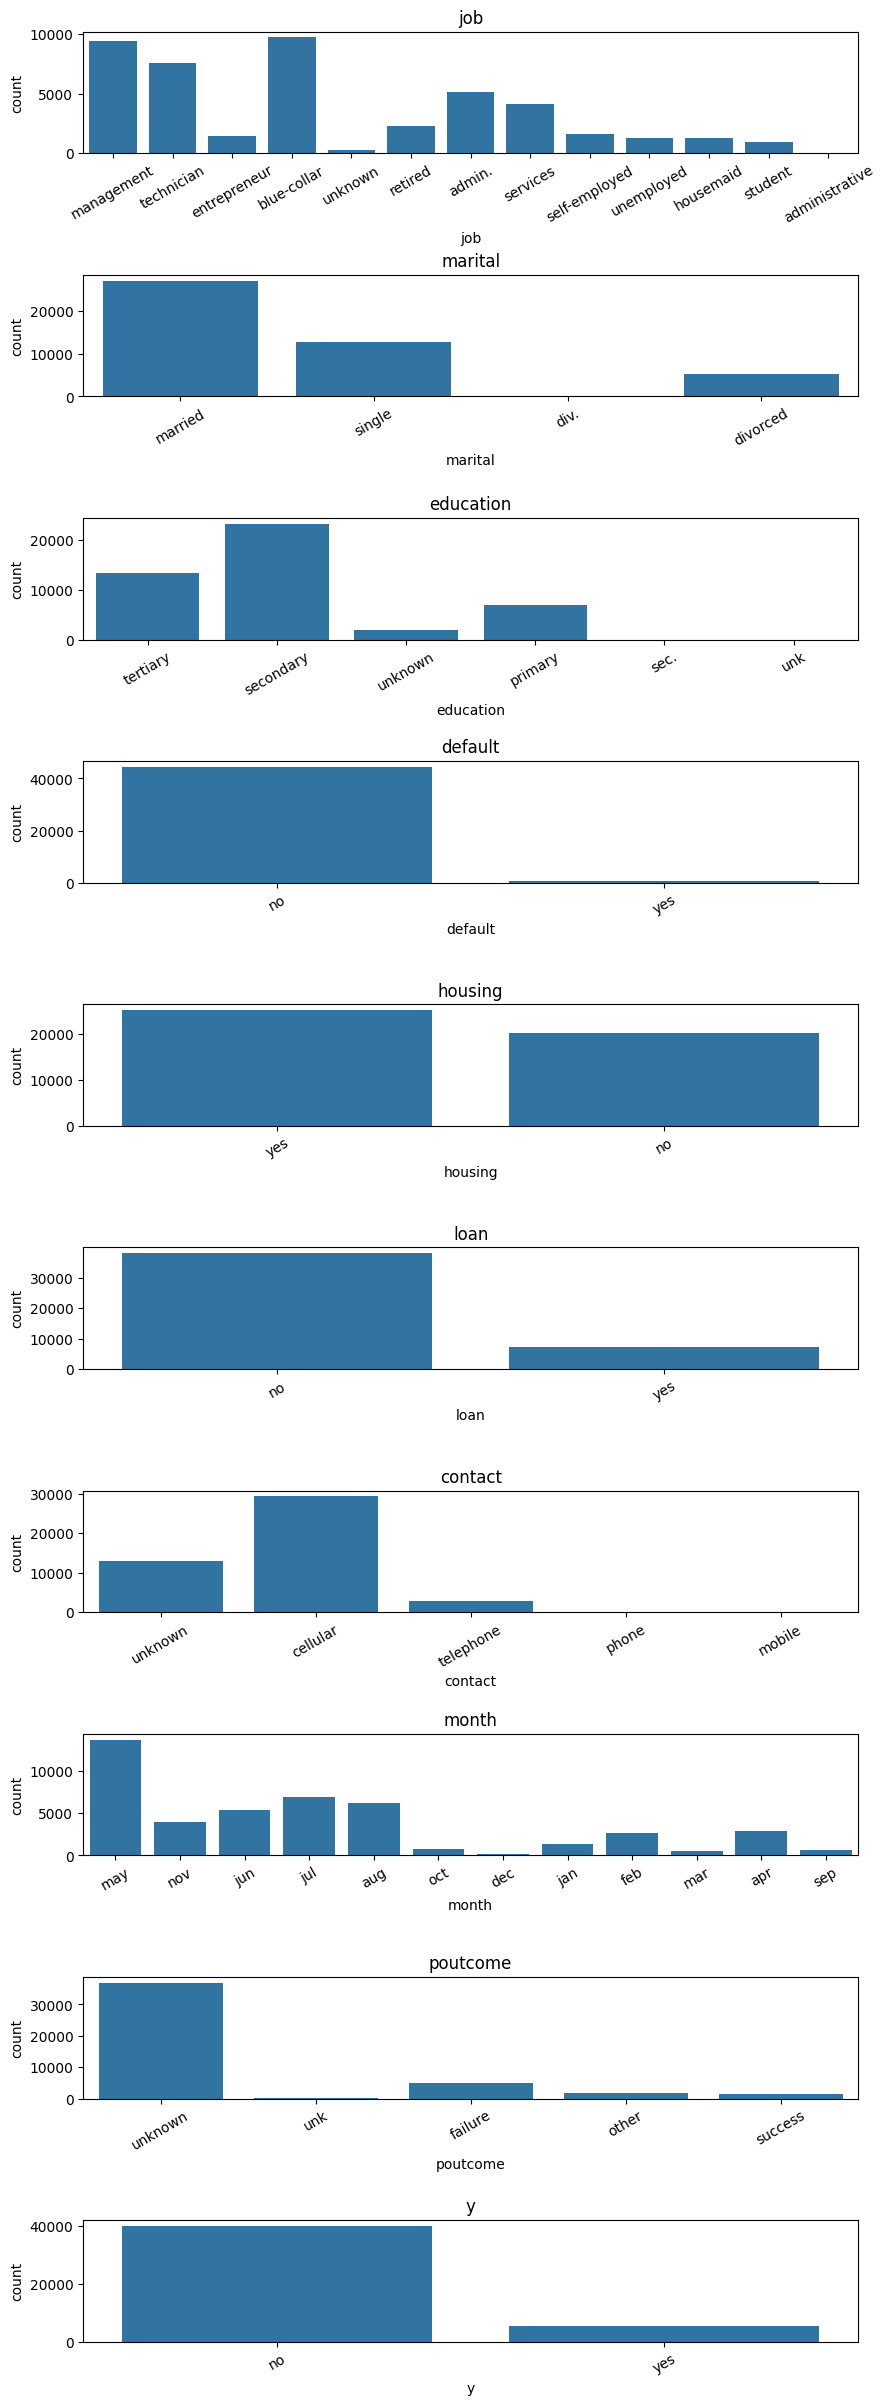

In [45]:
for columns in data.columns:
    #Representar en minúscula sólo si la columna es categorica
    if columns in cols_cat:
        data[columns] = data[columns].str.lower()

#Generemos nuevamente las grafias
fig, ax= plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sns.countplot(x= col, data = data, ax = ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 30)

In [65]:
#job: unificar admin. y administrative
print(data['job'].unique())
data['job'] = data['job'].str.replace('admin','administrative',regex=False)
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired'
 'administrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrative.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student'
 'administrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired'
 'administrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrative.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student'
 'administrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativeistrativ

In [66]:
#job: unificar admin. y administrative
print(data['marital'].unique())
data['marital'] = data['marital'].str.replace('div.','divorced',regex=False)
print(data['marital'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [67]:
#job: unificar admin. y administrative
print(data['education'].unique())
data['education'] = data['education'].str.replace('sec.','secondary',regex=False)
data[data['education']=='unk'] == 'unknown'
print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary' 'unk']


In [69]:
data.shape

(45194, 17)